In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


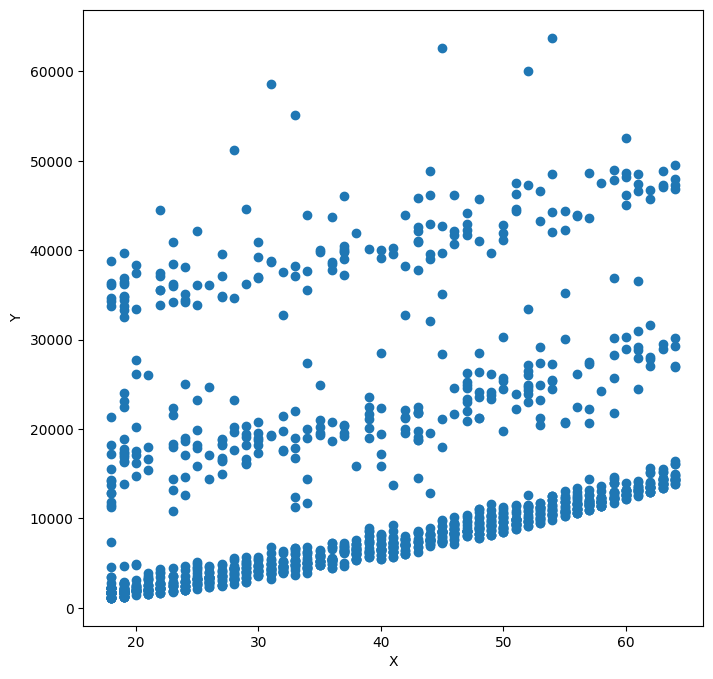

In [3]:
x = data['age']
y = data['charges']

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [8]:
print('선형회귀모델 결과')
print('절편 :', lr.intercept_, '계수 :', lr.coef_)

선형회귀모델 결과
절편 : [3165.88500606] 계수 : [[257.72261867]]


In [9]:
print(lr.score(x, y))

0.08940589967885804


In [11]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
y_hat

array([[ 8062.61476073],
       [19660.13260074]])

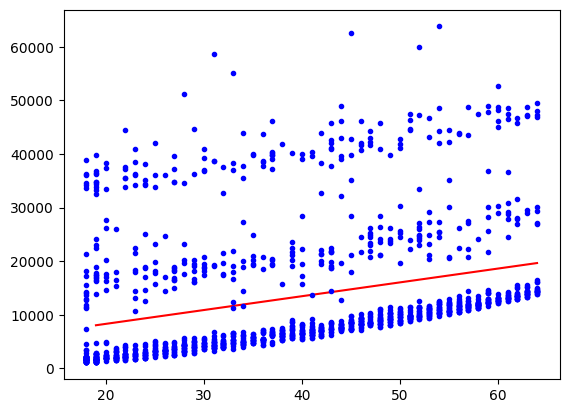

In [18]:
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, '.b')
plt.show()

# Gradient Descent


In [30]:
from sklearn.linear_model import SGDRegressor

x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

sgd_reg = SGDRegressor(max_iter=1000, random_state=45, verbose=1)
sgd_reg.fit(x, y.ravel())

-- Epoch 1
Norm: 3968541965.25, NNZs: 1, Bias: 5483923271.777904, T: 1338, Avg. loss: 1494229510793200572301312.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3250958683.13, NNZs: 1, Bias: 9901537151.275110, T: 2676, Avg. loss: 303522983204381463150592.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 91452687.29, NNZs: 1, Bias: 7656313452.833559, T: 4014, Avg. loss: 137891889421246047191040.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 335355360.50, NNZs: 1, Bias: 8209290620.087477, T: 5352, Avg. loss: 35715171344836603150336.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 222951864.27, NNZs: 1, Bias: 5868494888.651149, T: 6690, Avg. loss: 23213007442208905756672.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 184129751.78, NNZs: 1, Bias: 3748209486.802694, T: 8028, Avg. loss: 6733997935608851333120.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 93973998.89, NNZs: 1, Bias: 2793919502.989507, T: 9366, Avg. loss: 576451

SGDRegressor(random_state=45, verbose=1)

In [32]:
sgd_reg.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': 45,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 1,
 'warm_start': False}

In [27]:
print('SGD 모델 결과')
print('절편 :', sgd_reg.intercept_, '계수 :', sgd_reg.coef_)

SGD 모델 결과
절편 : [6931.05771231] 계수 : [90.62149214]


In [28]:
x_new=[[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[ 8652.866063   12730.83320937]


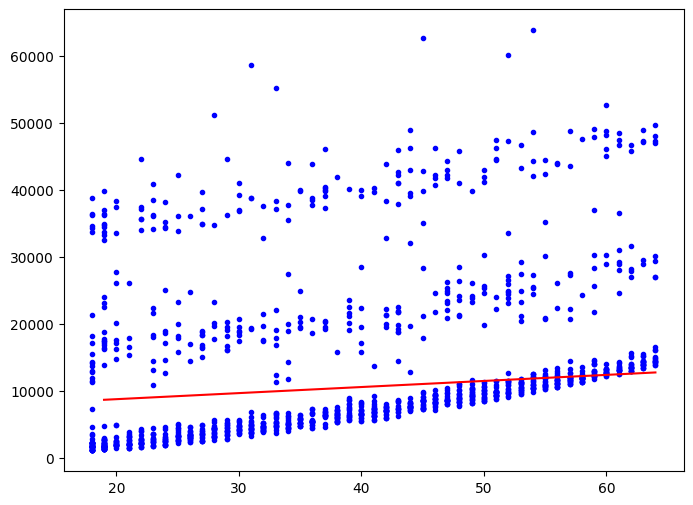

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b.')
plt.plot(x_new, y_hat, 'r-')
plt.show()

# 다항 회귀

In [42]:
cereal = pd.read_csv('../data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [43]:
cereal = cereal.drop(['name', 'mfr', 'type'], axis=1)
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


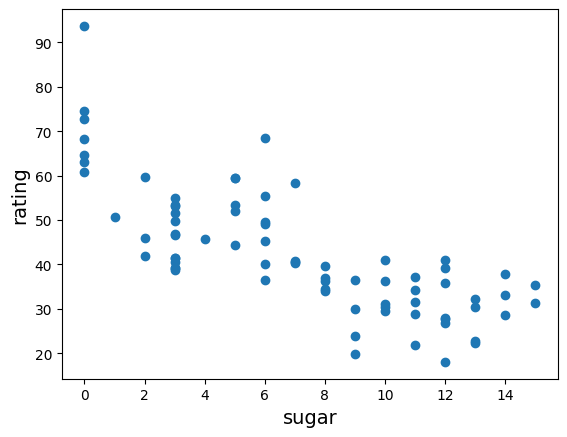

In [47]:
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)

x = cereal2['sugars'].values
y = cereal2['rating'].values

plt.scatter(x, y)
plt.xlabel('sugar', fontsize=14)
plt.ylabel('rating', fontsize=14)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [56]:
import numpy as np
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2)

print(np.concatenate((pred.reshape(len(pred), 1),
                     y_test.reshape(len(y_test), 1)), 1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

acc = reg.score(poly_reg.transform(X_test.reshape(-1, 1)), y_test)

print('MSE\t{:.3f}'.format(mse))
print('MAE\t{:.3f}'.format(mae))
print('RMSE\t{:.3f}'.format(rmse))
print('ACC\t{:.3f}'.format(acc*100))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376


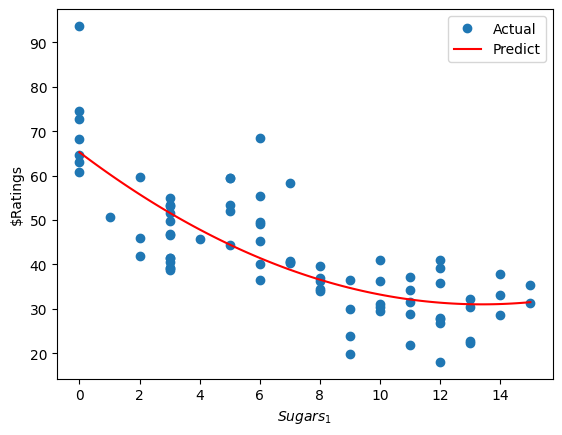

In [60]:
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label='Actual')
plt.plot(X_new, y_new, '-r', label='Predict')
plt.legend()
plt.xlabel('$Sugars_1$')
plt.ylabel('$Ratings')
plt.show()

In [61]:
X = cereal.iloc[:, :-1].values
y = cereal.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(53, 12) (23, 12)
(53,) (23,)


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [64]:
import numpy as np

X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

acc = reg.score(poly_reg.transform(X_test), y_test)

print('MSE\t{:.3f}'.format(mse))
print('MAE\t{:.3f}'.format(mae))
print('RMSE\t{:.3f}'.format(rmse))
print('ACC\t{:.3f}'.format(acc*100))

MSE	9.590
MAE	2.132
RMSE	3.097
ACC	92.645
